# Data Cube Interpolation of efficiency ratio

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 8th 2022  


- update : January 9th 2022

## Import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys
sys.path.append('../')

In [2]:
import os

In [3]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/Users/dagoret/anaconda3/bin/python
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
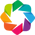

In [4]:
import numpy as np
import holoviews as hv
from holoviews import opts
hv.extension('bokeh', 'matplotlib')

In [5]:
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.interpolate import Rbf

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

## Configuration

In [7]:
WL = np.arange(441,1020) # for interpolation cannot do less
NWL = len(WL)

In [8]:
XMIN = -4.5
XMAX = 4.5
YMIN = -4.5
YMAX = 4.5
NX=50
NY=50
xx=np.linspace(XMIN,XMAX,NX)
yy=np.linspace(YMIN,YMAX,NY)

In [9]:
grid_x, grid_y = np.mgrid[XMIN:XMAX:50j, YMIN:YMAX:50j]

In [10]:
cmap="jet"

## Utility Functions

In [11]:
def get_list_of_position(arr):
    """
    Return the list of positions
    """
    
    
    ListOfPositions = [] 
    arrsize=len(arr)
    Npos=0
    
    for idx in np.arange(arrsize):
    
        currentposition = (arr[idx][1], arr[idx][2] )
    
        if currentposition not in ListOfPositions:
            ListOfPositions.append(currentposition)
            Npos+=1
            
            
    return Npos, ListOfPositions
    

In [12]:
def get_list_of_transmissions(arr):
    """
    
    """
    
    Narr=len(arr)
    Npos,list_of_position = get_list_of_position(arr)
    
    collectedtransmissions = np.empty(Npos, dtype=np.object)
    
    for idx in np.arange(Narr):   
        currentposition = (arr[idx][1], arr[idx][2])
        currentvalues = (arr[idx][3],arr[idx][4], arr[idx][5] )
  
    
        idx2=-1
        for position in list_of_position:
            idx2+=1
            
            if position == currentposition:
            
                if collectedtransmissions[idx2] == None:
                    collectedtransmissions[idx2] = []
                    collectedtransmissions[idx2].append(currentvalues)
                else:
                    collectedtransmissions[idx2].append(currentvalues)
                       
    
    return collectedtransmissions        

In [13]:
def find_nearest_point(list_of_points,x0=0,y0=0):
    
    N=len(list_of_points)
    distances = []
    
    for pos in list_of_points:
        dx=pos[0]-x0
        dy=pos[1]-y0
        distances.append(np.sqrt(dx**2 + dy**2))
    
    distances = np.array(distances)
    
    idx0 = np.where(distances == distances.min())[0][0]
    
    return idx0,distances[idx0]
    

In [14]:
def find_nearest_point_biggrid(x0=0,y0=0):
    
    dx=np.zeros(NX)
    dy=np.zeros(NY)
    
    for idx,x in np.ndenumerate(xx):
        dx[idx[0]] = np.abs(x-x0)
    for idx,y in np.ndenumerate(yy):
        dy[idx[0]] = np.abs(y-y0)
    
    idx0 = np.where(dx == dx.min())[0][0]
    idy0 = np.where(dy == dy.min())[0][0]
    
    return idx0,idy0

In [15]:
def get_transmission_center(arr,x0=0,y0=0):
    """
    return the transmission of existing position (x0,y0) 
    
    """
    
    wl0 = np.array([], dtype=np.float64)
    eff0 = np.array([], dtype=np.float64)
    eeff0 = np.array([], dtype=np.float64)
    
    Npos,list_of_position = get_list_of_position(arr)
    arr_ext = get_list_of_transmissions(arr)
    
    idx0,d0=find_nearest_point(list_of_position,x0=x0,y0=y0)
     
    
    # loop on different positions
    for idx in np.arange(Npos):    
        list_of_datapoints = arr_ext[idx]
        x,y = list_of_position[idx]
    
        if idx==idx0:
            wl,eff,eeff = zip(*list_of_datapoints)   
            wl0 = wl
            eff0 = eff
            eeff0 =eeff          
        
    return wl0,eff0,eeff0
       

In [16]:
def get_gridded_interpolated1d_effratio(wlin,arr,x0=0,y0=0):
    """
    Return the grid of interpolated efficiencies ratio wrt point position (x0,y0)
    
    input:
    - wlin : input wavelength
    - input array
    
    output:
    - list of efficiencies ratio related to the list_of_position
    
    """
    # ratio taken with respect to (x0,y0)
    wl0,eff0,eeff0 = get_transmission_center(arr,x0=x0,y0=y0)
    f0 = interpolate.interp1d(wl0,eff0)
    eff_0 = f0(wlin)
    
    
    Npos,list_of_position = get_list_of_position(arr)
    arr_ext = get_list_of_transmissions(arr)
    
    all_effratio=np.zeros(Npos)
    
    # loop on different positions
    for idx in np.arange(Npos):    
        list_of_datapoints = arr_ext[idx]
        x,y = list_of_position[idx]
        wl,eff,eeff = zip(*list_of_datapoints)   
        
        #print("get_gridded_interpolated1d_eff : ",min(wl),max(wl))
           
        f = interpolate.interp1d(wl,eff)
        
        eff = f(wlin)
        effratio = eff/eff_0
        all_effratio[idx] = effratio
        
    return all_effratio    

In [17]:
def get_interpolated2d_effratio(arr,interpolation_method='rbf'):
    """
    Cube of transmission efficiency ratio
    
    """  
    Npos,list_of_position = get_list_of_position(arr)
    
    arr_ext = get_list_of_transmissions(arr)
    
    x,y = list(zip(*list_of_position))
    
    
    # container of interpolated efficiencies ratio
    all_interp_effratio_data =np.zeros((NX,NY,NWL))
    
    # loop on wavelength
    for idxwl,thewl in np.ndenumerate(WL):
        indexwl = idxwl[0]
        
        
        # list of efficiencies ratio at that wavelength of each position
        effratio = get_gridded_interpolated1d_effratio(thewl,arr)
        
        if interpolation_method == 'rbf':
            rbf = Rbf(x, y, effratio)
            Z = rbf(grid_x, grid_y)
            
        all_interp_effratio_data[:,:,indexwl] = Z.T
        
    return all_interp_effratio_data
       

# Read Input file

In [18]:
datadir="data"
files_list= os.listdir(datadir)
print(files_list)
filename=files_list[1]
fullfilename=os.path.join(datadir,filename)
print(fullfilename)

['holo-scan-auxtel.pickle', '20200211-holo-4-003-uniformity-datacube.npy']
data/20200211-holo-4-003-uniformity-datacube.npy


In [19]:
arr=np.load(fullfilename)

In [20]:
arr.shape

(3443,)

In [21]:
NARR=arr.shape[0]

In [22]:
arr

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [23]:
order0 = arr["order"]== 0
order1 = arr["order"]== 1
order2 = arr["order"]== 2

In [24]:
arr_0 = arr[order0]
arr_1 = arr[order1]
arr_2 = arr[order2]

# Order 1

## List of positions

In [25]:
Npos1,list_of_position_1 = get_list_of_position(arr_1)

In [26]:
Npos1

48

In [27]:
print(list_of_position_1)

[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 4.0), (0.0, -1.0), (0.0, -2.0), (0.0, -4.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 4.0), (1.0, -1.0), (1.0, -2.0), (1.0, -4.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.0), (2.0, -1.0), (2.0, -2.0), (2.0, -4.0), (4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 4.0), (4.0, -1.0), (4.0, -2.0), (-1.0, 0.0), (-1.0, 1.0), (-1.0, 2.0), (-1.0, 4.0), (-1.0, -1.0), (-1.0, -2.0), (-1.0, -4.0), (-2.0, 0.0), (-2.0, 1.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, -1.0), (-2.0, -2.0), (-2.0, -4.0), (-4.0, 0.0), (-4.0, 1.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, -1.0), (-4.0, -2.0), (-4.0, -4.0)]


In [28]:
len(list_of_position_1)

48

In [29]:
wl4,eff4,eeff4 = get_transmission_center(arr_1,x0=4,y0=4)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


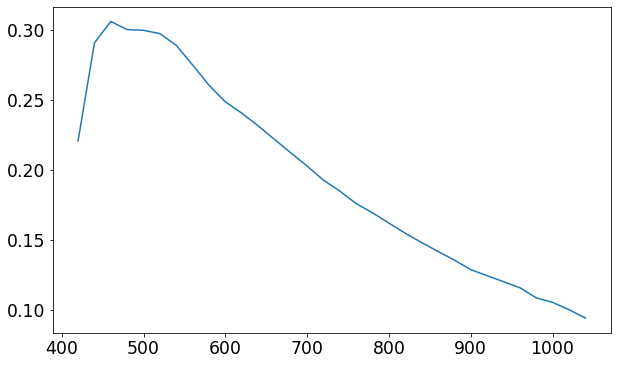

In [30]:
plt.plot(wl4,eff4)

In [31]:
np.array(wl4).min()

419.989

In [32]:
np.array(wl4).max()

1040.023

## Find the list of different positions

In [33]:
arr_1_ext = get_list_of_transmissions(arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [34]:
len(arr_1_ext)

48

In [35]:
wl0,eff0,eeff0 = get_transmission_center(arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


## Interpolate gridded data for efficiency ratio

In [36]:
#wlin = 450
wlin = 441
effratio_1 = get_gridded_interpolated1d_effratio(wlin,arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [37]:
grid_z0 = griddata(list_of_position_1, effratio_1, (grid_x, grid_y), method='nearest',fill_value=0)

grid_z1 = griddata(list_of_position_1, effratio_1, (grid_x, grid_y), method='linear')

grid_z2 = griddata(list_of_position_1, effratio_1, (grid_x, grid_y), method='cubic')

Text(0.5, 1.0, 'Cubic')

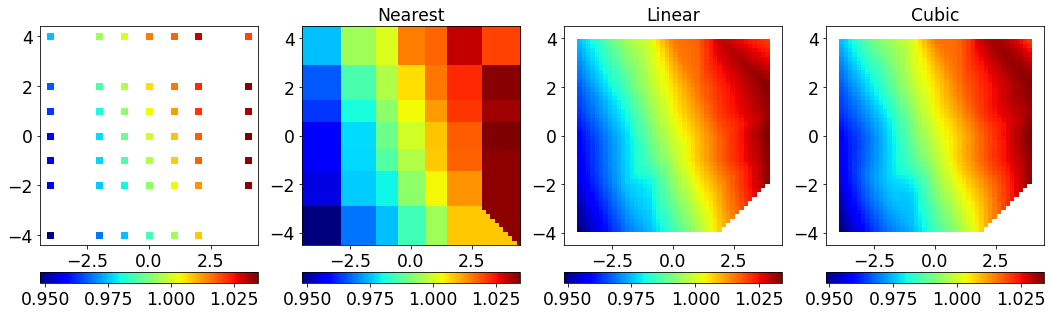

In [38]:
points = list_of_position_1

fig = plt.figure(figsize=(18,10))


ax = fig.add_subplot(1,4,1)
x,y = list(zip(*points))

im = ax.scatter(x,y,marker='s',c=effratio_1,cmap=cmap)
ax.set_aspect("equal")
fig.colorbar(im, orientation="horizontal", pad=0.05)


ax = fig.add_subplot(1,4,2)
im= ax.imshow(grid_z0.T, extent=(XMIN,XMAX,YMIN,YMAX), origin='lower',cmap=cmap)
ax.set_aspect("equal")
fig.colorbar(im, orientation="horizontal", pad=0.05)
ax.set_title('Nearest')

ax = fig.add_subplot(1,4,3)
im= ax.imshow(grid_z1.T, extent=(XMIN,XMAX,YMIN,YMAX), origin='lower',cmap=cmap)
ax.set_aspect("equal")
fig.colorbar(im, orientation="horizontal", pad=0.05)
ax.set_title('Linear')

ax = fig.add_subplot(1,4,4)
im= ax.imshow(grid_z2.T, extent=(XMIN,XMAX,YMIN,YMAX), origin='lower',cmap=cmap)
ax.set_aspect("equal")
fig.colorbar(im, orientation="horizontal", pad=0.05)
ax.set_title('Cubic')

#plt.gcf().set_size_inches(6, 6)

#plt.show()

In [39]:
print(list(zip(x,y)))

[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 4.0), (0.0, -1.0), (0.0, -2.0), (0.0, -4.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 4.0), (1.0, -1.0), (1.0, -2.0), (1.0, -4.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.0), (2.0, -1.0), (2.0, -2.0), (2.0, -4.0), (4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 4.0), (4.0, -1.0), (4.0, -2.0), (-1.0, 0.0), (-1.0, 1.0), (-1.0, 2.0), (-1.0, 4.0), (-1.0, -1.0), (-1.0, -2.0), (-1.0, -4.0), (-2.0, 0.0), (-2.0, 1.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, -1.0), (-2.0, -2.0), (-2.0, -4.0), (-4.0, 0.0), (-4.0, 1.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, -1.0), (-4.0, -2.0), (-4.0, -4.0)]


In [40]:
wlin = 450
eff_a = get_gridded_interpolated1d_effratio(wlin,arr_1)

wlin = 500
eff_b = get_gridded_interpolated1d_effratio(wlin,arr_1)

wlin = 600
eff_c = get_gridded_interpolated1d_effratio(wlin,arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [41]:
grid_z0

array([[0.94775688, 0.94775688, 0.94775688, ..., 0.97500036, 0.97500036,
        0.97500036],
       [0.94775688, 0.94775688, 0.94775688, ..., 0.97500036, 0.97500036,
        0.97500036],
       [0.94775688, 0.94775688, 0.94775688, ..., 0.97500036, 0.97500036,
        0.97500036],
       ...,
       [1.00811891, 1.00811891, 1.03313297, ..., 1.0205232 , 1.0205232 ,
        1.0205232 ],
       [1.00811891, 1.03313297, 1.03313297, ..., 1.0205232 , 1.0205232 ,
        1.0205232 ],
       [1.03313297, 1.03313297, 1.03313297, ..., 1.0205232 , 1.0205232 ,
        1.0205232 ]])

In [42]:
grid_z1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [43]:
grid_z2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

- gridded data interpolation is not working. It give nan

## Interpolate with Radial Basis Functions

In [44]:
#rbf = Rbf(x, y, eff_1, epsilon=1)
rbf = Rbf(x, y, effratio_1)

In [45]:
Z= rbf(grid_x, grid_y)

In [46]:
ZMIN=Z.min()
ZMAX=Z.max()

<ipython-input-47-e29e106b500f>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(grid_x, grid_y, Z, shading='flat', **lims)


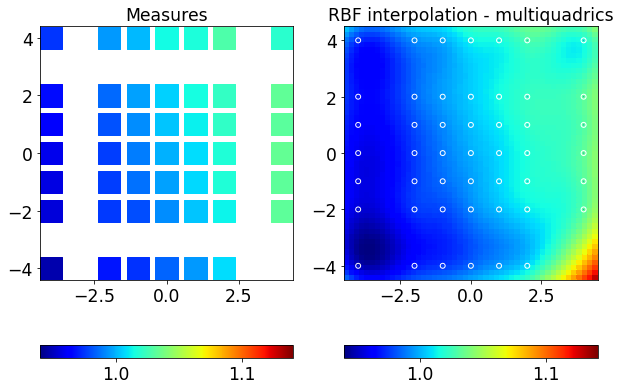

In [47]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(1,2,1)
x,y = list(zip(*points))

im = ax.scatter(x,y,marker='s',s=500,c=effratio_1,cmap=cmap,vmin=ZMIN, vmax=ZMAX)
ax.set_aspect("equal")
fig.colorbar(im, orientation="horizontal", pad=0.1)
ax.set_title('Measures')

ax = fig.add_subplot(1,2,2)

#X_edges, Y_edges = np.meshgrid(edges, edges)

#lims = dict(cmap='RdBu_r', vmin=ZMIN, vmax=ZMAX)
lims = dict(cmap=cmap, vmin=ZMIN, vmax=ZMAX)

im=ax.pcolormesh(grid_x, grid_y, Z, shading='flat', **lims)

ax.scatter(x, y, effratio_1, edgecolor='w', lw=5, **lims)

ax.set_title('RBF interpolation - multiquadrics')

ax.set_xlim(XMIN, YMAX)

ax.set_ylim(YMIN, YMAX)

plt.colorbar(im,orientation="horizontal", pad=0.1)
ax.set_aspect('equal')

# Make Multiarray

In [48]:
effratio_multiarray = get_interpolated2d_effratio(arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [49]:
effratio_multiarray.shape

(50, 50, 579)

Text(0.5, 1.0, 'efficency ratio at wl=451 nm')

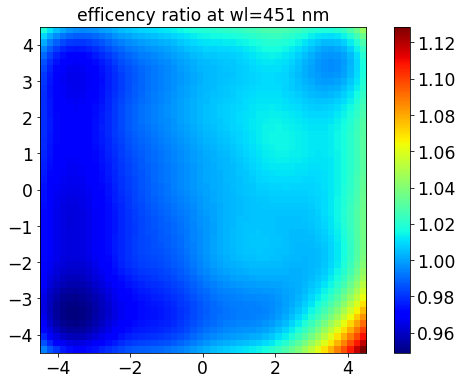

In [50]:
idxwl=10
im=plt.imshow(effratio_multiarray[:,:,idxwl],origin="lower",extent=(XMIN,XMAX,YMIN,YMAX),cmap=cmap)
plt.colorbar(im)
title=f"efficency ratio at wl={WL[idxwl]} nm"
plt.title(title)

# Check interpolation

In [51]:
effratio_multiarray = get_interpolated2d_effratio(arr_1)

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [52]:
effratio_multiarray.shape

(50, 50, 579)

In [53]:
arr_1

array([(1,  0.,  0.,  400.014, 0.08113432, 0.00042531),
       (1,  0.,  0.,  419.989, 0.12204722, 0.00055285),
       (1,  0.,  0.,  440.023, 0.28427847, 0.0003543 ), ...,
       (1, -4., -4.,  999.966, 0.12115345, 0.00016043),
       (1, -4., -4., 1019.98 , 0.11694063, 0.00014926),
       (1, -4., -4., 1040.023, 0.10674954, 0.00015927)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [54]:
idxpos=-1

all_interpolated1d_efficienciesratio = []
all_interpolated2d_efficienciesratio = []


for pos in list_of_position_1:
    idxpos+=1  
    x=pos[0]
    y=pos[1]
    idx,idy=find_nearest_point_biggrid(x0=x,y0=y)
    
    
    pos_efficiencyratio=np.zeros(NWL)
    for idxwl in range(NWL):
        wlin=WL[idxwl]
        effratio_pos_1 = get_gridded_interpolated1d_effratio(wlin,arr_1)
        pos_efficiencyratio[idxwl] = effratio_pos_1[idxpos]
        
    all_interpolated1d_efficienciesratio.append(pos_efficiencyratio)    
    all_interpolated2d_efficienciesratio.append(effratio_multiarray[idx,idy,:])

<ipython-input-12-16ccd35c4c68>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


Text(0.5, 0.98, 'transmission efficiency ratio vs wavelength at different position')

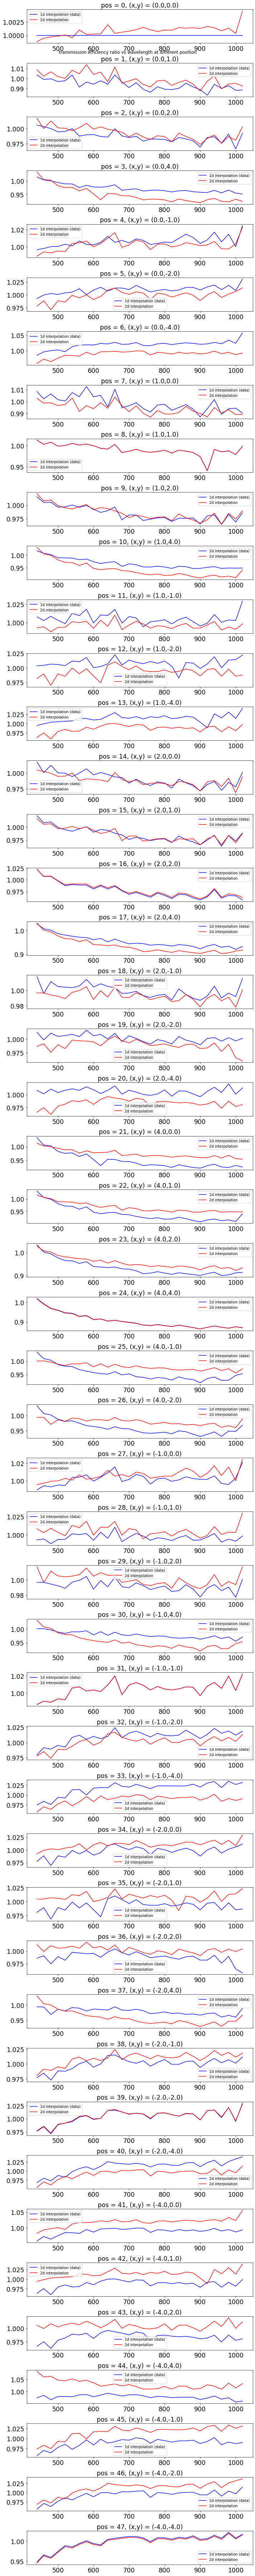

In [55]:
fig=plt.figure(figsize=(10,100))
for idxpos in range(Npos1):
    fig.add_subplot(Npos1,1,idxpos+1)
    plt.plot(WL,all_interpolated1d_efficienciesratio[idxpos],'b-',label='1d interpolation (data)')
    plt.plot(WL,all_interpolated2d_efficienciesratio[idxpos],'r-',label='2d interpolation')
    pos = list_of_position_1[idxpos]
    title=f"pos = {idxpos}, (x,y) = ({pos[0]},{pos[1]})"
    plt.title(title)
    plt.legend()
fig.tight_layout()
plt.suptitle("transmission efficiency ratio vs wavelength at different position")

Text(0.5, 0.98, 'transmission efficiency ratio vs wavelength at different position')

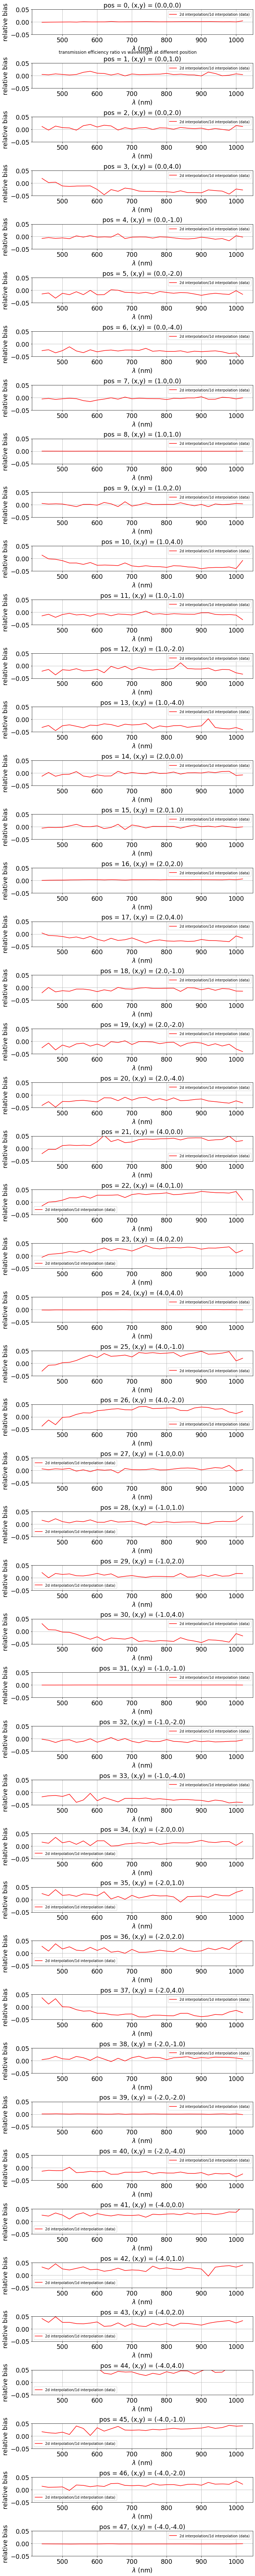

In [56]:
fig=plt.figure(figsize=(10,100))
for idxpos in range(Npos1):
    fig.add_subplot(Npos1,1,idxpos+1)
    ratio=all_interpolated2d_efficienciesratio[idxpos]/all_interpolated1d_efficienciesratio[idxpos]
    plt.plot(WL,ratio-1,'r-',label='2d interpolation/1d interpolation (data)')
    pos = list_of_position_1[idxpos]
    title=f"pos = {idxpos}, (x,y) = ({pos[0]},{pos[1]})"
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.ylim(-0.05,0.05)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("relative bias")
fig.tight_layout()
plt.suptitle("transmission efficiency ratio vs wavelength at different position")